# Data Visualization with Government Units

In this exercise, we will explore creating bar graphs and scatter plots with [some public sector data from Census.gov](https://data.census.gov/cedsci/table?d=PUB%20Public%20Sector%20Annual%20Surveys%20Public%20Sector%20Annual%20Surveys&tid=GOVSTIMESERIES.CG00ORG02&hidePreview=false&vintage=2018).  Note: We have provided a modified dataset as part of the exercise.  We have cleaned the data and reorganized it in a way that it is easier to use for reporting.  We cover cleaning and reshaping data in our full course, though not in this preview course.

This Jupyter Notebook file assumes that **govt2017_values.csv** is in the same folder as this file.

Import `pandas` with the alias of `pd`

In [1]:
import pandas as pd

Using `read_csv()`, store the contents of `govt2017_values.csv` in a variable named `govt_2017`.

In [2]:
govt_2017 = pd.read_csv('govt2017_values.csv')

Inspect the `govt_2017`DataFrame to see how many rows and columns it has.

In [3]:
govt_2017.shape

(51, 10)

Inspect the column types to know what kind of data you are working with.

In [4]:
govt_2017.dtypes

NAME                                                                                                    object
Total Local Government Units                                                                             int64
Total Local Government Units - County Governments                                                        int64
Total Local Government Units - General Purpose Governments                                               int64
Total Local Government Units - Special Purpose Governments                                               int64
Total Local Government Units - Special Purpose Governments - Independent School District Governments     int64
Total Local Government Units - Special Purpose Governments - Special District Governments                int64
Total Local Government Units - Subcounty Governments                                                     int64
Total Local Government Units - Subcounty Governments - Municipal Governments                             int64
T

## Creating Bar Charts

In the accompany lesson, we explain how to create bar charts.  In this exercise, we will create both the standard vertical bar chart as well as rotate it into a horizontal bar chart.

For this bar chart, we are concerned with two columns - `NAME` and `Total Local Government Units`.  As there are spaces in the field names, we will need to use bracket notation rather than dot notation.

Create a variable called `total_units` and store in those 2 columns from the `govt_2017` DataFrame.

In [5]:
total_units = govt_2017[['NAME', 'Total Local Government Units']]

We want to sort those values by `Total Local Government Units` highest to lowest (`ascending=False`). `sort_values()` will operate on the DataFrame you call it on.  However, we want to capture this result in a variable named `sorted_totals` so that we can work with it later.

In [6]:
sorted_total = total_units.sort_values(by = 'Total Local Government Units', ascending = False)

We want to plot the top 10 totals of local government units by state.  To keep things simple, store the first 10 records of our `sorted_totals` in a variable named `sorted_totals_top10`.

In [7]:
sorted_totals_top10 = sorted_total.head(10)

Once the top 10 data is stored, generate a bar graph off of the `plot` property on the `sorted_totals_top10` variable.  For the call to the `bar()` function, pass in 'NAME' for the x value.

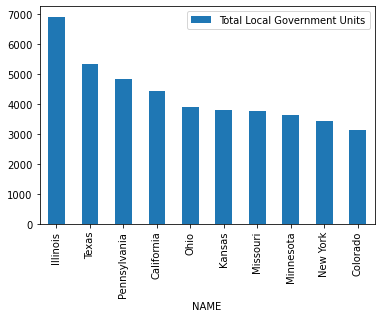

In [8]:
sorted_totals_top10.plot(kind = 'bar', x = 'NAME');

Now, we want to work with this bar graph and add x and y labels.

1. Import `matplotlib.pyplot` as `plt`.
2. Use the magic function `%matplotlib inline` to keep our plots in the notebook.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In the following code block:

1. Store a plot in a variable named `ax` using the `plot()` function off of `sorted_totals_top10` with the following information:
    - Title: **Top 10 Total Local Government Units by State**
    - Kind: **bar**
    - x: **NAME**
2. Set the x axis label to **State**.
3. Set the y axis label to **Number of Local Government Units**.
4. Show the plot

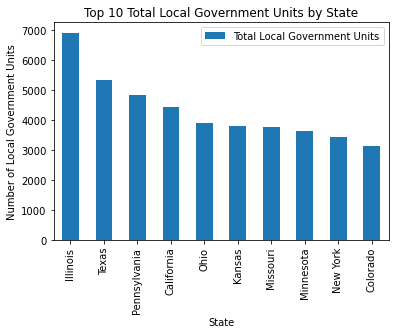

In [10]:
ax = sorted_totals_top10.plot(
    title = 'Top 10 Total Local Government Units by State',
    kind = 'bar',
    x = 'NAME',
    xlabel = 'State',
    ylabel = 'Number of Local Government Units'
)
ax;

## Creating Horizontal Bar Charts

We can flip the vertical bar to a horizontal chart by setting the `kind` parameter to **barh** and update our axis labels accordingly.

In the following code block:

1. Store a plot in a variable named `ax` using the `plot()` function off of `sorted_totals_top10` with the following information:
    - Title: **Top 10 Total Local Government Units by State**
    - Kind: **barh**
    - x: **NAME**
2. Set the x axis label to Number of Local Government Units.
3. Set the y axis label to State.
4. Show the plot

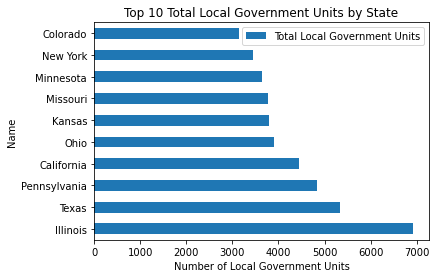

In [11]:
ax1 = sorted_totals_top10.plot(
    title = 'Top 10 Total Local Government Units by State',
    x = 'NAME',
    kind = 'barh'  
)
ax1.set_xlabel("Number of Local Government Units")
ax1.set_ylabel("Name")
ax1;

## Creating Scatter Plots

As we mentioned in the lesson, scatter plots are good for understanding relationships between numerical data.  For this exercise, we are going to look at the relationships of the following columns of the `govt_2017` DataFrame:
    
    - Total Local Government Units - General Purpose Governments
    - Total Local Government Units - Special Purpose Governments
    - Total Local Government Units - County Governments
    
Create a variable named `scatter_data` and store these columns from the `govt_2017` dataset.

In [12]:
scatter_data = govt_2017[
    [
        'Total Local Government Units - General Purpose Governments',
         'Total Local Government Units - Special Purpose Governments',
         'Total Local Government Units - County Governments'
    ]
]

Create a scatter plot using the `scatter()` function of the `plot` property of the `scatter_data` DataFrame with the following parameters:

- Title: **General Purpose vs Special Purpose**
- x: **Total Local Government Units - General Purpose Governments**
- y: **Total Local Government Units - Special Purpose Governments**

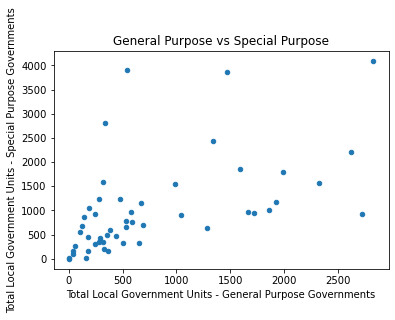

In [13]:
scatter_data.plot(
    kind = 'scatter', 
    title = 'General Purpose vs Special Purpose',
    x = 'Total Local Government Units - General Purpose Governments',
    y = 'Total Local Government Units - Special Purpose Governments'
)
scatter_data;

What relationship did you observe from the scatter plot?  Did you see points dense in an area versus scattered on the outskirts?

 - Seems to be expanding in a sort of funnel path

### Plotting Multiple Series Against a Common Variable in a Scatter Plot

As we mentioned in the lesson, it is possible to plot multiple series in a scatter plot.  If you are doing this, you need a way to differentiate your series.

For this part of our exercise, we will explore any relationships between the county and general purpose units, in addition to the special and general purpose unit comparison.

To make things easier to read - as these column names are long - we will store each column in a variable.

1. Create a variable named `general_purpose` and store in the `Total Local Government Units - General Purpose Governments` column of `scatter_data`.
2. Create a variable named `special_purpose` and store in the  `Total Local Government Units - Special Purpose Governments` column of `scatter_data`.
3. Create a variable named `county_purpose` and store in the  `Total Local Government Units - County Governments` column of `scatter_data`.

In [14]:
general_purpose = scatter_data['Total Local Government Units - General Purpose Governments']
special_purpose = scatter_data['Total Local Government Units - Special Purpose Governments']
county_purpose = scatter_data['Total Local Government Units - County Governments']

In the following code cell:

1. Using `plt.scatter()`, create a plot with the following details:
    - x: **general_purpose**
    - y: **special_purpose**
    - c: **#838286**
    - label: **Special Purpose**
2. Using `plt.scatter()`, create a plot with the following details:
    - x: **general_purpose**
    - y: **county_purpose**
    - c: **#ed1650**
    - label: **County**
3. Set the title to **Special Purpose and County vs General Purpose**.
4. Set the x axis label to **Total Units**.
5. Set the y axis label to **Total Units**.
6. Set the legend location to 1.  (Note: When we render the plot, there may be data under the legend.)
7. Show the plot.

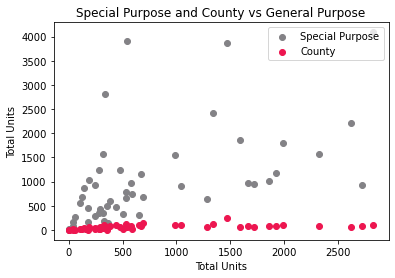

In [15]:
plt.scatter(x = general_purpose, y = special_purpose, c = '#838286', label = 'Special Purpose')
plt.scatter(x = general_purpose, y = county_purpose, c = '#ed1650', label = 'County')
plt.title('Special Purpose and County vs General Purpose')
plt.ylabel('Total Units')
plt.xlabel('Total Units')
plt.legend(loc = 1);


What observations do you notice about this scatter plot?

Neither variable has good correlation, but special purpose has better.